<a href="https://colab.research.google.com/github/UR-Field-Labs/nlp/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/newspapers/combined_file.csv')
df.head()

,website_name,category,title,authors,published_date,content,language,url,key
0,Setopati,Politics,Constitutional Council meeting ends without re...,NaN,01-08-2023,The Constitutional Council meeting held on Tue...,English,https://en.setopati.com/political/161488,NaN
1,Setopati,Politics,Uddhav Thapa appointed Koshi chief minister again,NaN,01-08-2023,Uddhav Thapa of Nepali Congress has become chi...,English,https://en.setopati.com/political/161487,NaN
2,Setopati,Politics,House meeting postponed until Monday,NaN,01-08-2023,The House of Representatives (HoR) meeting has...,English,https://en.setopati.com/political/161486,NaN
3,Setopati,Politics,Pun refutes connection to Dawa Tsering arreste...,NaN,31-07-2023,CPN (Maoist Center) Deputy General Secretary B...,English,https://en.setopati.com/political/161480,NaN
4,Setopati,Politics,Maoist Center also opts for live broadcast of ...,NaN,31-07-2023,CPN (Maoist Center) has also decided to broadc...,English,https://en.setopati.com/political/161479,NaN


In [ ]:
len(df)

11583

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


<ipython-input-6-777b36172dd0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['content'].apply(analyze_sentiment_vader)
<ipython-input-6-777b36172dd0>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment_category'] = filtered_df['sentiment'].apply(sentiment_category)


                                               content  sentiment  \
23   A total of 29 persons have been killed while 2...    -0.9946   
24   Good Neighbors International (GNI) Nepal celeb...     0.9976   
47   During the monsoon season, almost every day, w...    -0.9971   
48   The politics is heated in the past few days du...     0.9844   
56   What does the future of humanity look like? Ma...     0.9993   
73   The Meteorological Forecast Division (MFD) has...     0.9144   
75   Nepal Rastra Bank, the central bank, has agree...     0.8724   
85   The much-awaited meeting of the Central Commit...     0.9885   
98   The most-anticipated fashion event of the coun...     0.9981   
102  She has secured her space in Nepali theatre as...     0.9927   
110  The government has shown keen interest in expe...     0.9853   
116  There is no exact data on the number of refuge...     0.4215   
118  For the first time, Nepal has been able to exp...     0.9509   
130  " Climate change is the bigge

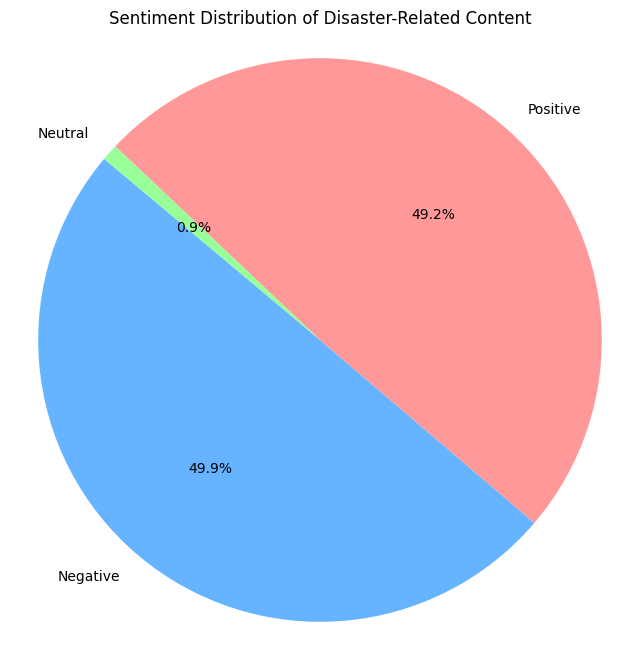

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define keywords
words_to_check = ["floods", "landslide", "landslides", "hailstorm", "disaster", "lightning", "wildfire", "wildfires", "flood", "pollution", "emissions"]

# Function to check if any keyword is in the content
def contains_keyword(text, keywords):
    return any(keyword in text.lower() for keyword in keywords)

# Filter the dataframe based on keywords
filtered_df = df[df['content'].apply(lambda x: contains_keyword(str(x), words_to_check))]

# Perform sentiment analysis with VADER
def analyze_sentiment_vader(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Add sentiment scores to the dataframe
filtered_df['sentiment'] = filtered_df['content'].apply(analyze_sentiment_vader)

# Categorize sentiments
def sentiment_category(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

filtered_df['sentiment_category'] = filtered_df['sentiment'].apply(sentiment_category)

# Print sample content and sentiment scores for inspection
sample = filtered_df[['content', 'sentiment', 'sentiment_category']].head(20)
print(sample)

# Generate pie chart
sentiment_counts = filtered_df['sentiment_category'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title('Sentiment Distribution of Disaster-Related Content')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


In [ ]:
# Print the counts of each sentiment category
print("Number of Positive contents:", sentiment_counts.get('Positive', 0))
print("Number of Negative contents:", sentiment_counts.get('Negative', 0))
print("Number of Neutral contents:", sentiment_counts.get('Neutral', 0))

Number of Positive contents: 364
Number of Negative contents: 369
Number of Neutral contents: 7


In [ ]:
# Print the number of rows containing disaster-related words
num_disaster_related_rows = len(filtered_df)
print(num_disaster_related_rows)
total_rows = len(df)
print(f"Number of rows containing disaster-related words: {num_disaster_related_rows}")

740
Number of rows containing disaster-related words: 740


In [ ]:
print(f"Number of rows containing disaster-related words: {num_disaster_related_rows/total_rows}")

Number of rows containing disaster-related words: 0.06388673055339722


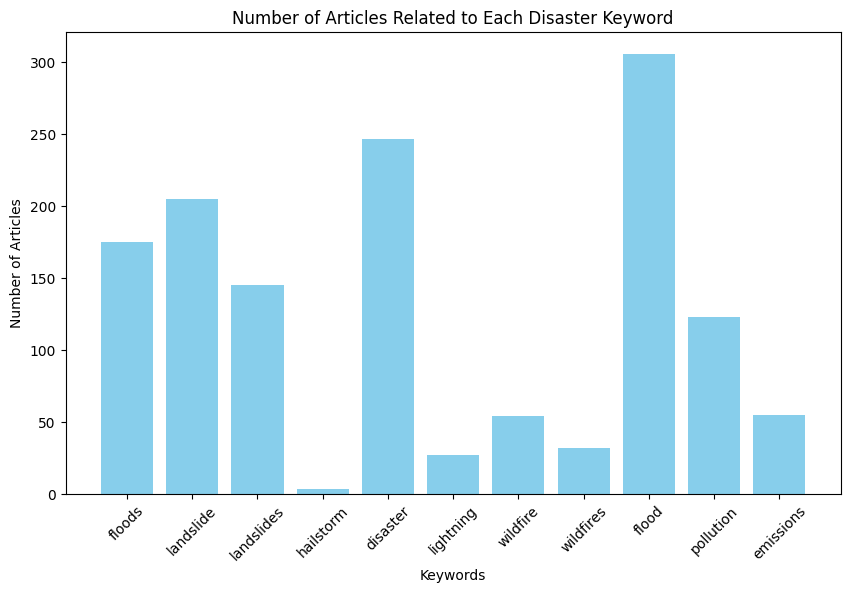

In [ ]:
# Count the number of articles related to each keyword
keyword_counts = {keyword: 0 for keyword in words_to_check}
for text in df['content']:
    for keyword in words_to_check:
        if keyword in str(text).lower():
            keyword_counts[keyword] += 1

# Convert the keyword counts to a DataFrame for plotting
keyword_counts_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(keyword_counts_df['Keyword'], keyword_counts_df['Count'], color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Related to Each Disaster Keyword')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Count unique values in 'website_name' column
website_counts = df['website_name'].value_counts()

# Convert the website counts to a DataFrame for plotting
website_counts_df = website_counts.reset_index()
website_counts_df.columns = ['Website', 'Count']

# Plot bar chart for website counts
plt.figure(figsize=(12, 8))
bars = plt.bar(website_counts_df['Website'], website_counts_df['Count'], color='lightgreen')
plt.xlabel('Website')
plt.ylabel('Number of Articles')
plt.title('Number of Articles from Each Website')
plt.xticks(rotation=90)

# Add text annotations to show the number of articles for each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.show()